# Making map plot

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from matplotlib.patches import Patch
import matplotlib as mpl

### Import the data

In [ ]:
london = pd.read_csv('../data/london2022.csv')
merseyside = pd.read_csv('../data/merseyside2022.csv')

# https://geoportal.statistics.gov.uk/datasets/02e8d336d6804fbeabe6c972e5a27b16_0/explore?location=53.390230%2C-2.976211%2C12.31&showTable=true
lsoa_shapes = gpd.read_file('../data/mapping_csvs/LSOA_boundaries/LSOA_2021_EW_BSC_V4.shp')


## Plot the MERSEYSIDE LSOA Stop count

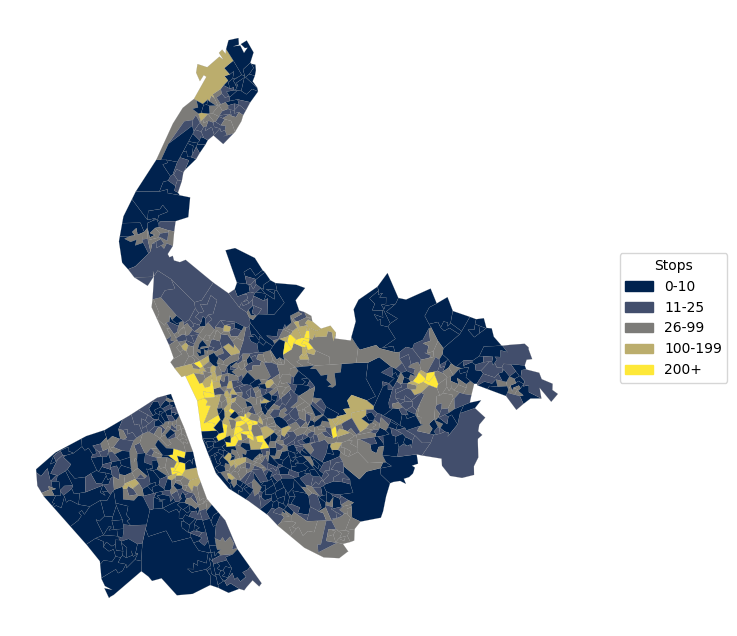

In [56]:
df_stops = merseyside['LSOA code'].value_counts().reset_index()
df_stops.columns = ['LSOA21CD', 'stop_counts']  # Match LSOA code column name

# Merge LSOA shapes with your stop and search data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_stops['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_stops, on='LSOA21CD', how='left')

# Define the bins and their labels
bins = [0, 10, 25, 99, 199, float('inf')]
bin_labels = ['0-10', '11-25', '26-99', '100-199', '200+']

# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='stop_counts', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
ax.legend(handles=legend_handles, title="Stops", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')



ax.set_axis_off()
plt.savefig('../figures_and_plots/merseyside_stops_map.svg', bbox_inches='tight')
#
  # Replace with your desired latitude range
plt.show()


## Plot the LONDON LSOA Stop count

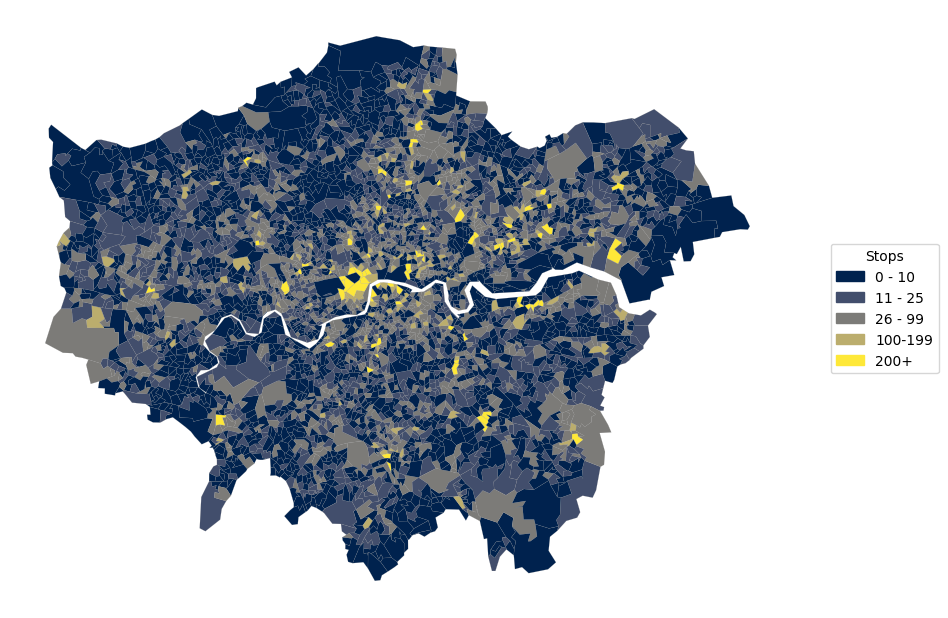

In [57]:
df_stops = london['LSOA code'].value_counts().reset_index()
df_stops.columns = ['LSOA21CD', 'stop_counts']  # Match LSOA code column name

# Merge LSOA shapes with your stop and search data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_stops['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_stops, on='LSOA21CD', how='left')

# Define the bins and their labels
bins = [0, 10, 25, 99, 199, float('inf')]
bin_labels = ['0 - 10', '11 - 25', '26 - 99', '100-199', '200+']

# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='stop_counts', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
ax.legend(handles=legend_handles, title="Stops", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')



ax.set_axis_off()
plt.savefig('../figures_and_plots/london_stops_map.svg', bbox_inches='tight')

plt.show()


# Plotting the HOUSE PRICES

## Merseyside

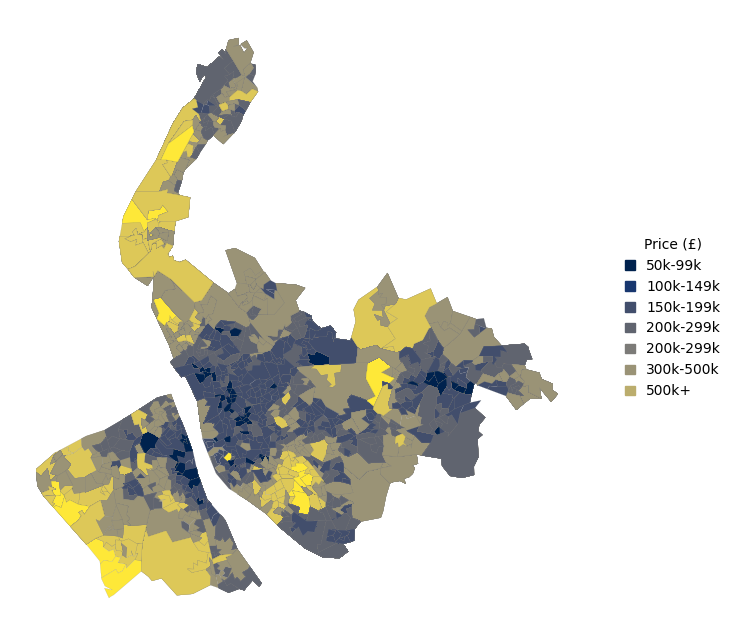

In [58]:


df_price = merseyside[['LSOA code','mean_house_price']]
df_price.columns = ['LSOA21CD', 'price']  # Match LSOA code column name

# Merge LSOA shapes with your price data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_price['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_price, on='LSOA21CD', how='left')



# Define the bins and their labels
bins = [50000, 99999, 100000, 149999, 199999, 200000, 299999,  300000, 500000, float('inf')]
bin_labels = ['50k-99k', '100k-149k', '150k-199k', '200k-299k', '200k-299k', '300k-500k','500k+']


# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='price', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="Price (£)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
plt.savefig('../figures_and_plots/merseyside_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


## London

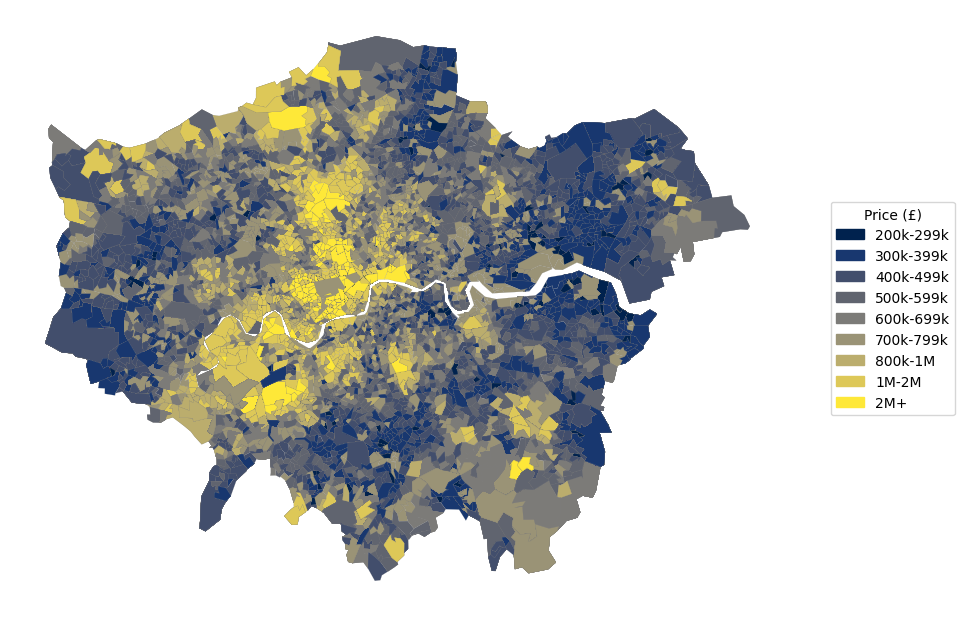

In [59]:


df_price = london[['LSOA code','mean_house_price']]
df_price.columns = ['LSOA21CD', 'price']  # Match LSOA code column name

# Merge LSOA shapes with your price data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_price['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_price, on='LSOA21CD', how='left')



# Define the bins and their labels
bins = [200000, 299999, 400000, 500000, 600000, 700000, 800000, 1000000, 2000000, float('inf')]
bin_labels = ['200k-299k', '300k-399k', '400k-499k', '500k-599k', '600k-699k', '700k-799k', '800k-1M', '1M-2M', '2M+']


# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='price', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, title="Price (£)", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
plt.savefig('../figures_and_plots/london_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


## Add to other jup

In [60]:
# # Step 1: Get stop counts per LSOA
# stop_counts = london['LSOA code'].value_counts().reset_index()
# stop_counts.columns = ['LSOA21CD', 'stop_counts']  # Rename columns for clarity

# # Step 2: Merge with population data
# lsoas_population = london[['LSOA code', 'LSOA population']].rename(columns={'LSOA code': 'LSOA21CD'})
# merged_lsoas = pd.merge(stop_counts, lsoas_population, on='LSOA21CD', how='left')

# # Step 3: Calculate stops per area (stops per population)
# merged_lsoas['stops_per_area'] = merged_lsoas['stop_counts'] / merged_lsoas['LSOA population'] * 100


# # london['stops_per_LSOA'] = 